# Lending Club Case Study

#### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

#### Reading Data

In [4]:
data = pd.read_csv(r'C:\Users\nikhil-sharma\OneDrive - MMC\Desktop\Nikhil\Upgrad\LendingClubCaseStudy\loan.csv',low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### To Know the count of rows and columns in the data set

In [5]:
data.shape

(39717, 111)

#### Name of the columns

In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

#### Some important columns in the dataset are loan_amount, terms, interest rate, grade, subgrade, annual income, purpose of the loan, etc.
###### Target Variable is loan status

### Data Cleaning

#### Finding Missing Values

In [7]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

#### Columns which have more than 30 percent of null values are not important to us
#### Eliminating Them...

In [ ]:
data.drop(null_perc[ null_perc > 40 ].index, axis=1, inplace=True)

In [9]:
# checking the number of columns left
data.shape

(39717, 53)

#### Finding number of unique values in each column

In [13]:
data.nunique().sort_values().head(15)


tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

#### Columns tax_liens,delinq_amnt,chargeoff_within_12_mths,acc_now_delinq,application_type,policy_code,  collections_12_mths_ex_med,initial_list_status,pymnt_plan have only one unique value so they are not useful

In [15]:
#Dropping Columns with only one values.
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)


In [16]:
data.shape

(39717, 44)

#### Finding number of unique values

In [17]:

data.nunique().sort_values(ascending=False).head(44)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

#### total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv variables are valid for borrowers who have already taken a loan. As we are only interested only in loan application details these columns can be removed. 
#### recoveries, collection_recovery_fee columns are only valid for charged off loans. So these columns are also not required.
#### emp_title, and title columns have text values which are more unique values. So we can drop these columns as well.
#### id, url, and member_id having all unique values which means any one of these can be used as primary key.We have used id as a primary key and remove url and member id columns.

In [18]:
data.drop(['member_id', 'url','total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','out_prncp', 'out_prncp_inv'], axis=1, inplace=True)


In [19]:
data.shape

(39717, 33)

#### Loan Status Column has 3 distict values out of them we need only Fully Paid and Charged Off. So, we will remove the rows with Current values in loan status.

In [21]:
data = data[data.loan_status != 'Current']

In [22]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

#### Removing the blank space

In [23]:
data['term'] = data.term.str.strip()
data.term.unique()

C:\Users\nikhil-sharma\AppData\Local\Temp\ipykernel_11352\1630941809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['term'] = data.term.str.strip()


array(['36 months', '60 months'], dtype=object)

In [24]:
data.shape

(38577, 33)

#### Data Type Conversion

In [26]:
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pym

In [33]:
#Columns int_rate and revol_util are having '%' symbol values and having data type of object.
data['int_rate'] = data.int_rate.astype(str).str.strip('%').astype(float)    
data['revol_util'] = data.revol_util.astype(str).str.strip('%').astype(float)

C:\Users\nikhil-sharma\AppData\Local\Temp\ipykernel_11352\1440543224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['int_rate'] = data.int_rate.astype(str).str.strip('%').astype(float)
C:\Users\nikhil-sharma\AppData\Local\Temp\ipykernel_11352\1440543224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['revol_util'] = data.revol_util.astype(str).str.strip('%').astype(float)


#### issue_d, earliest_cr_line are having date values.
#### Converting these column data type to date.

In [34]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

C:\Users\nikhil-sharma\AppData\Local\Temp\ipykernel_11352\2952866251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')


In [35]:
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                  

### Derived Variables

#### issue_d column


In [36]:
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#### earliest_cr_line


In [37]:
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')

#### data type conversion of year and weekday


In [38]:
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

##### Creating a new variable named  Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.

In [39]:
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)


In [41]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_ratio
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0,2011,Dec,3,1985,Jan,99.5
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0,2011,Dec,3,1999,Apr,100.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0,2011,Dec,3,2001,Nov,100.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0,2011,Dec,3,1996,Feb,100.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0,2011,Dec,3,2004,Nov,100.0


In [42]:
data.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_title                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
title                               object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6m

## Univariate Analysis

### 1.Loan amount

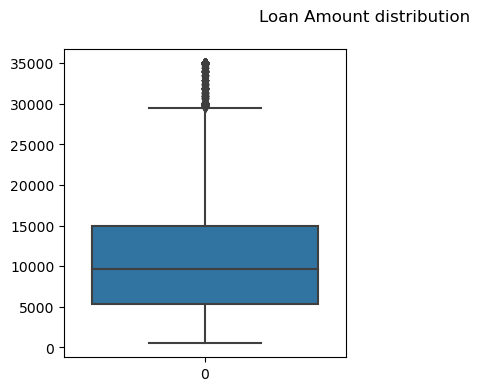

In [64]:
#Increasing the figure size of plot
plt.figure(figsize=(8,4))
#Setting subplot index

plt.subplot(1,2,1)
#Box plot
sns.boxplot(data=data.loan_amnt)
plt.suptitle('Loan Amount distribution')
plt.show()

#### Statistics of loan amount

In [54]:

data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
5%        2400.000000
10%       3090.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Observations:
##### From the above plots, more number of people took loan amount of 10000, and also median of distribution is 10000. And very few people took more than 30000 loan amount.

### 2.Funded Amount

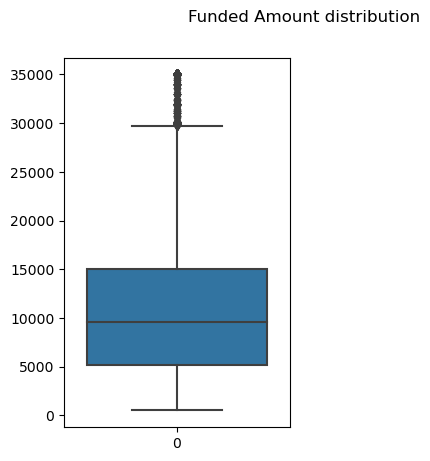

In [63]:
#The total amount committed to that loan at that point in time.

plt.subplot(1,2,1)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [65]:
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
5%        2400.000000
10%       3000.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

#### Observations:
###### Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.

### 3.Approved Loan Amount Ratio

C:\Users\nikhil-sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


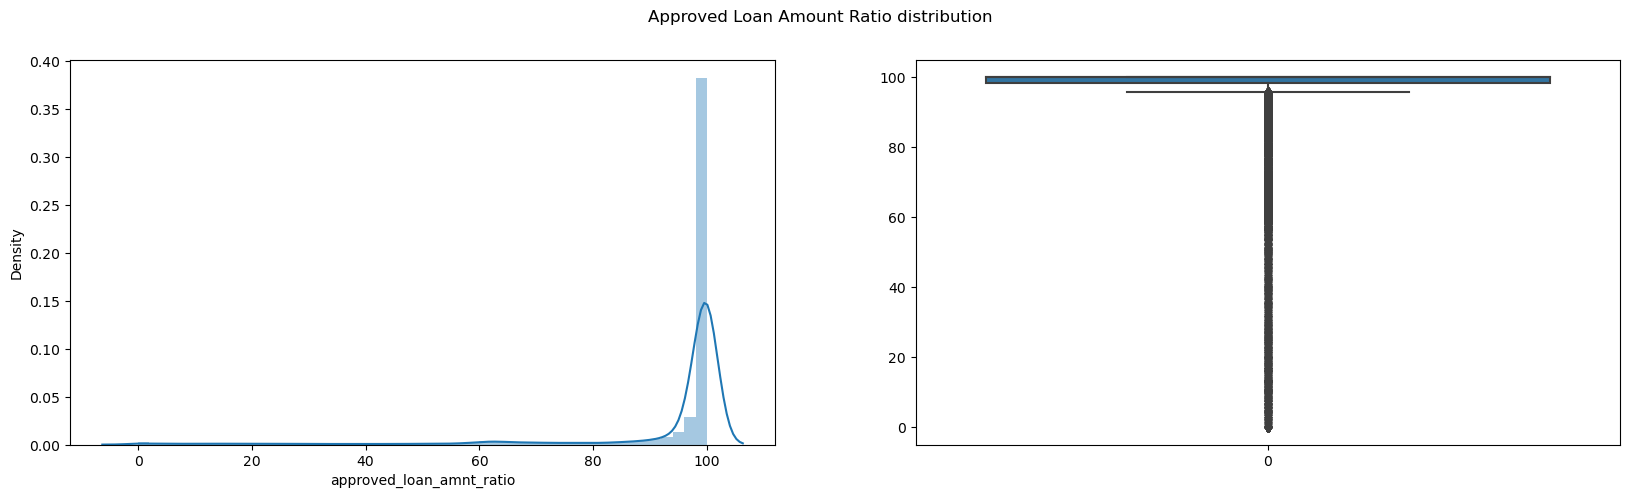

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

#### Observations: 70% of Borrowers got 100% loan amount from investors.


### 4.Interest Rate

C:\Users\nikhil-sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhil-sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


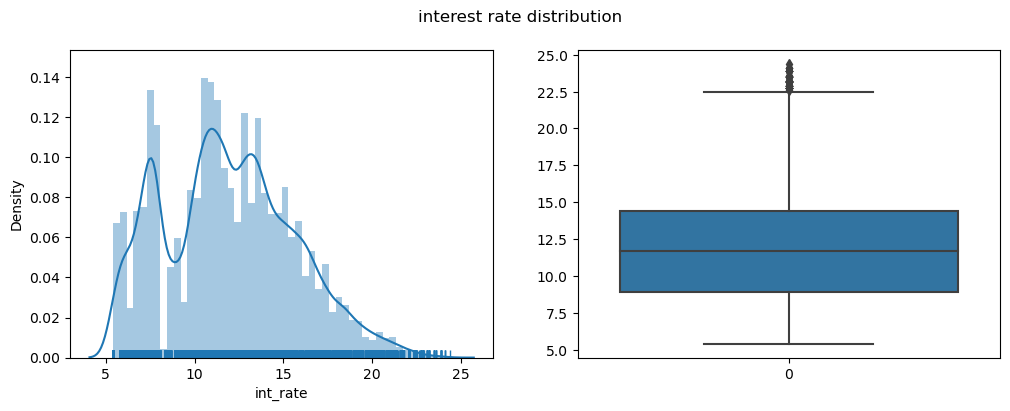

In [71]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)
plt.suptitle('Interest Rate distribution')
plt.show()

#### Observation:
###### From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between 9% to 14.5%. Some people took loan at higher rates of interest i.e., 22.5%

### 5.Loan Status

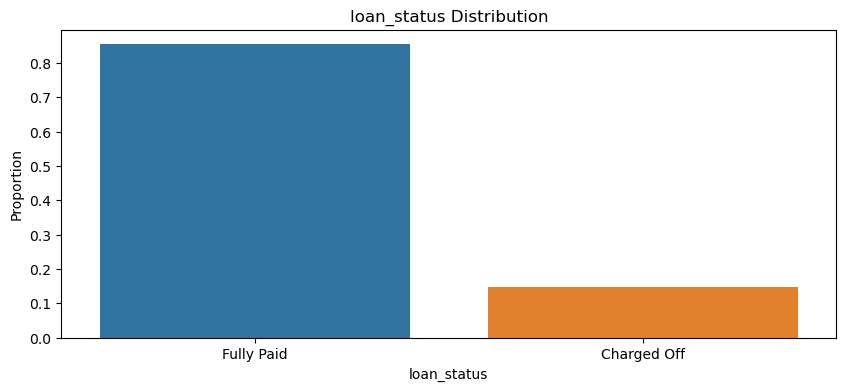

In [72]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observation:
##### 85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

## Segmented Univariate Analysis

### 1.Loan Amount

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

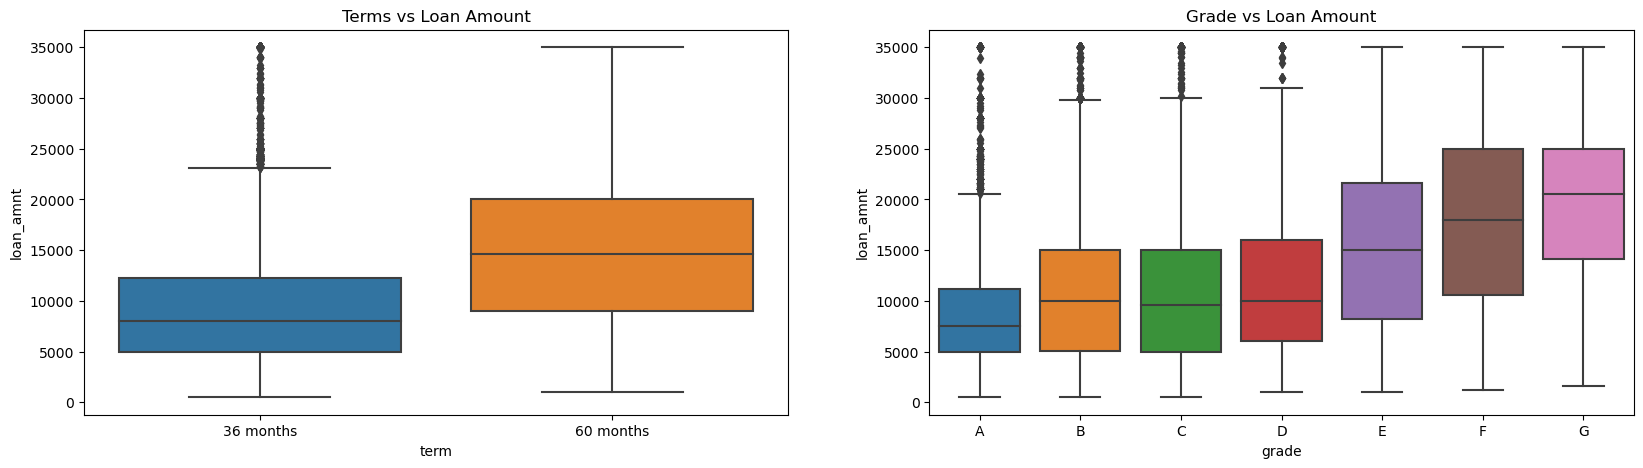

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)


Text(0.5, 1.0, 'loan_status vs Loan Amount')

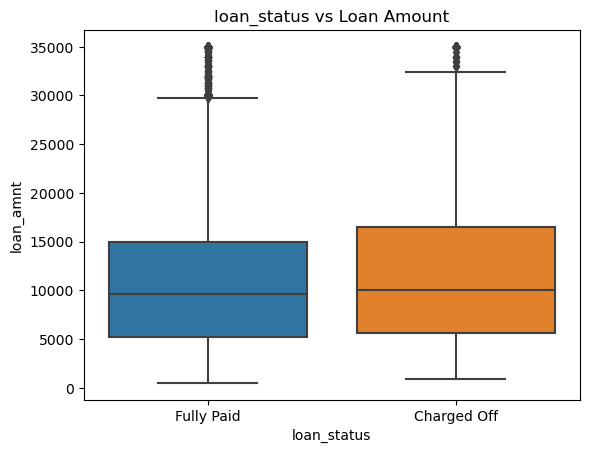

In [77]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

#### Observations:
##### a.Higher amount loans have high tenure i.e, 60 months.
##### b,Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.
##### c.Charged Off loans have higher amounts than Fully Paid ones.

### 2.Interest rate

<AxesSubplot:title={'center':'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

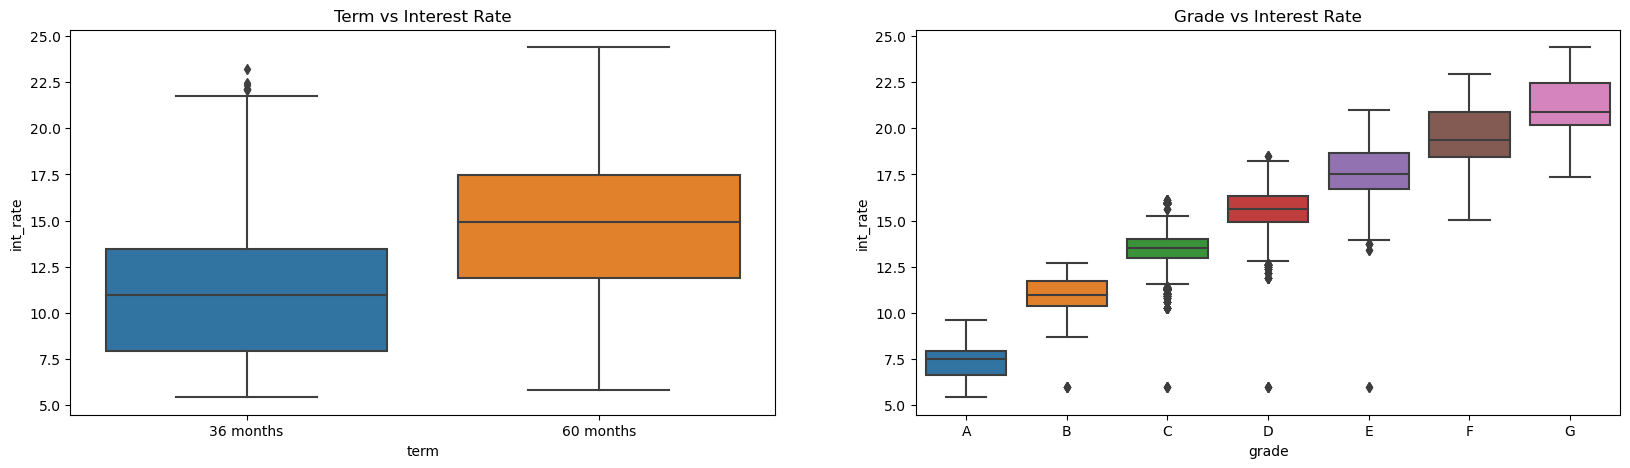

In [78]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

#### Observation:
##### The interest rates are higher for Higher tenure loans.
##### And Also Interest Rates are Higher as Grades are Lowering (A to G).

Text(0.5, 1.0, 'loan_status vs Interest Rate')

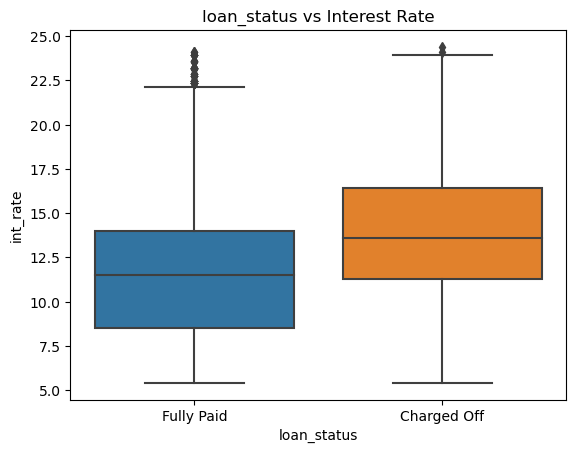

In [79]:
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

#### Observations:
##### Greater the interest rate more the chance of Defaulting the loan.

## Bivariate Analysis

### 1.Term vs Loan Status

C:\Users\nikhil-sharma\AppData\Local\Temp\ipykernel_11352\4274992404.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Term vs Loan status')

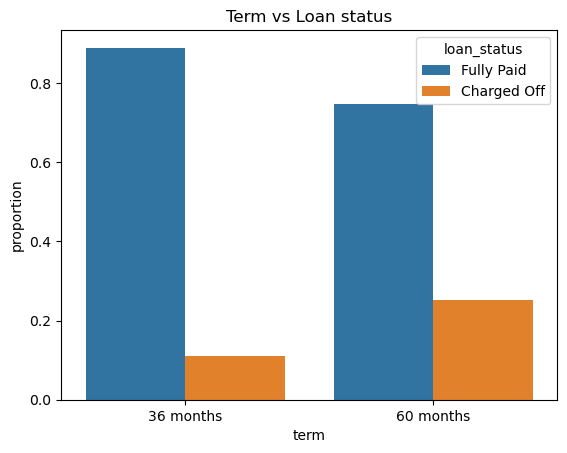

In [80]:
#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

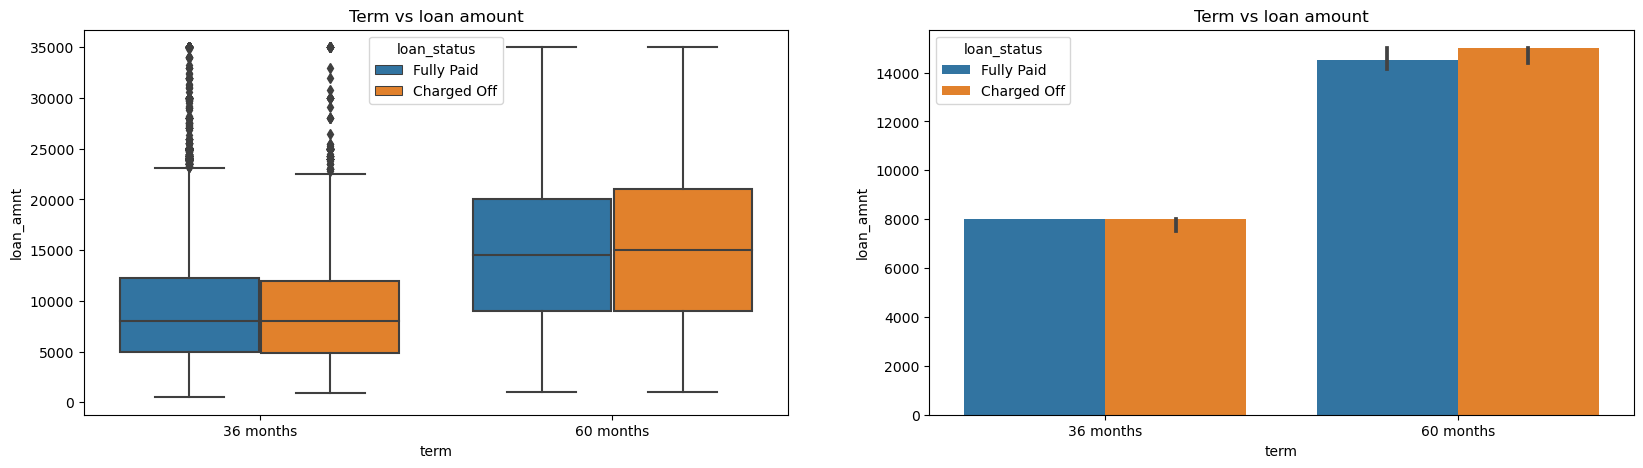

In [81]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

#### Observations:
##### Proportion of borrowers defaulted loan in 60 months term is more than in 36 months. 
##### Fully Paid rate is higher in 36 months tenure.
##### Loan amount is not a decider for defaults in both 36 adn 60 months.
##### Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

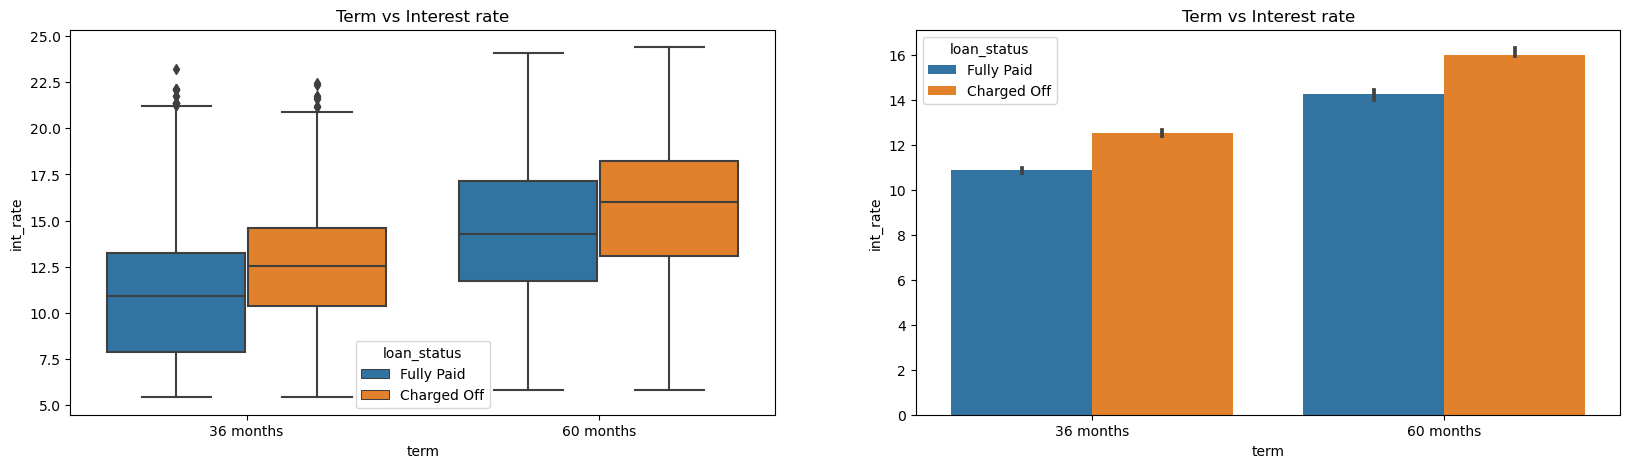

In [82]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

#### Observations:
##### For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

### 2.Grade

C:\Users\nikhil-sharma\AppData\Local\Temp\ipykernel_11352\3982164985.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

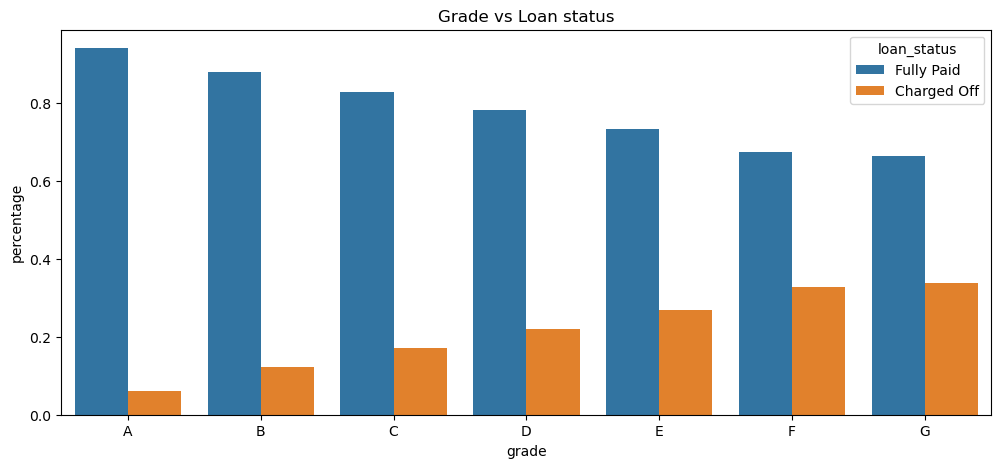

In [83]:
grade_ord = data.grade.unique()
grade_ord.sort()
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

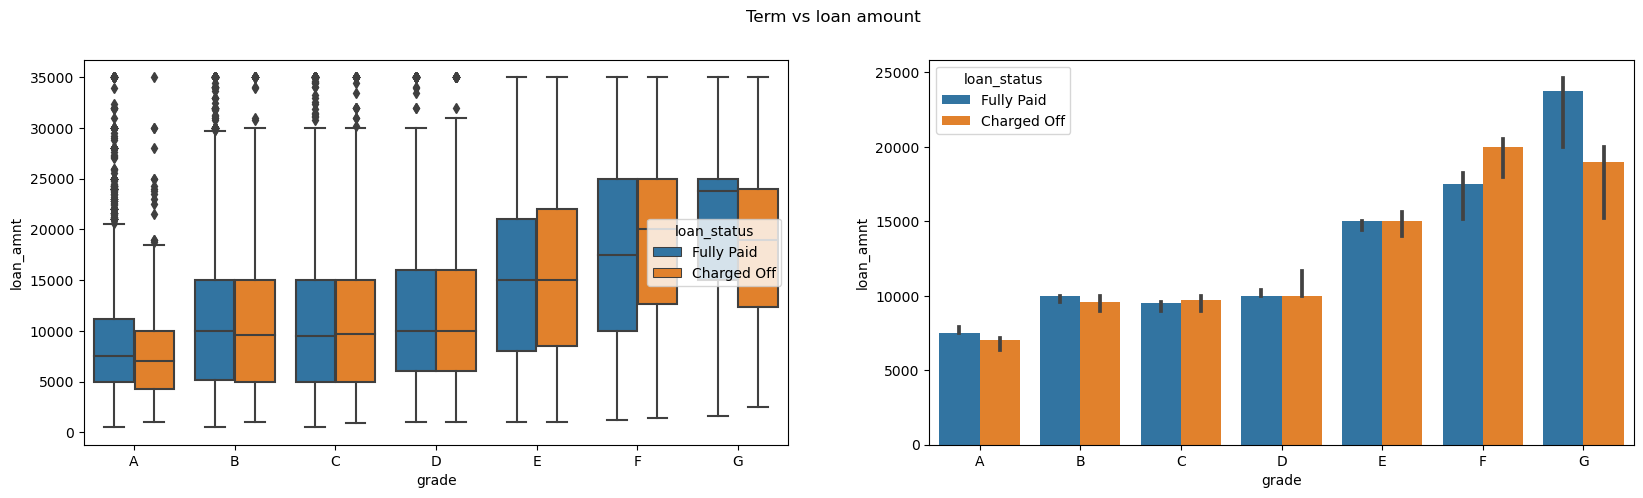

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

#### Observations:

##### Charged off increases as grades decreases.
##### For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.
##### The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

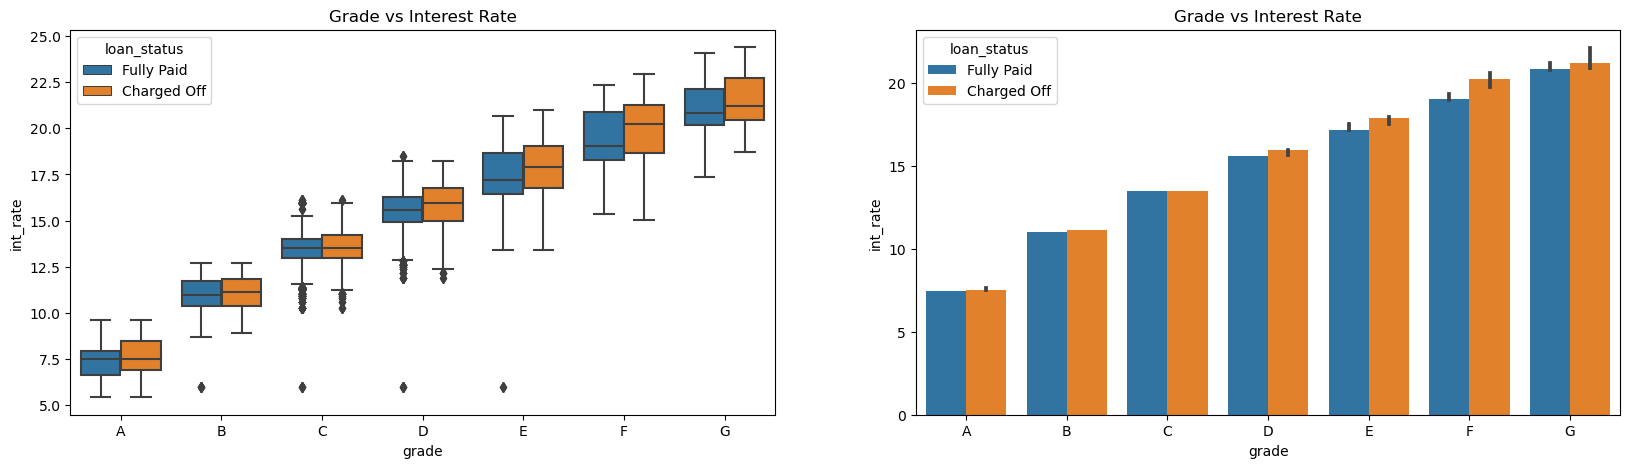

In [85]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

#### Observation:
###### As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.

## Correlation Matrix

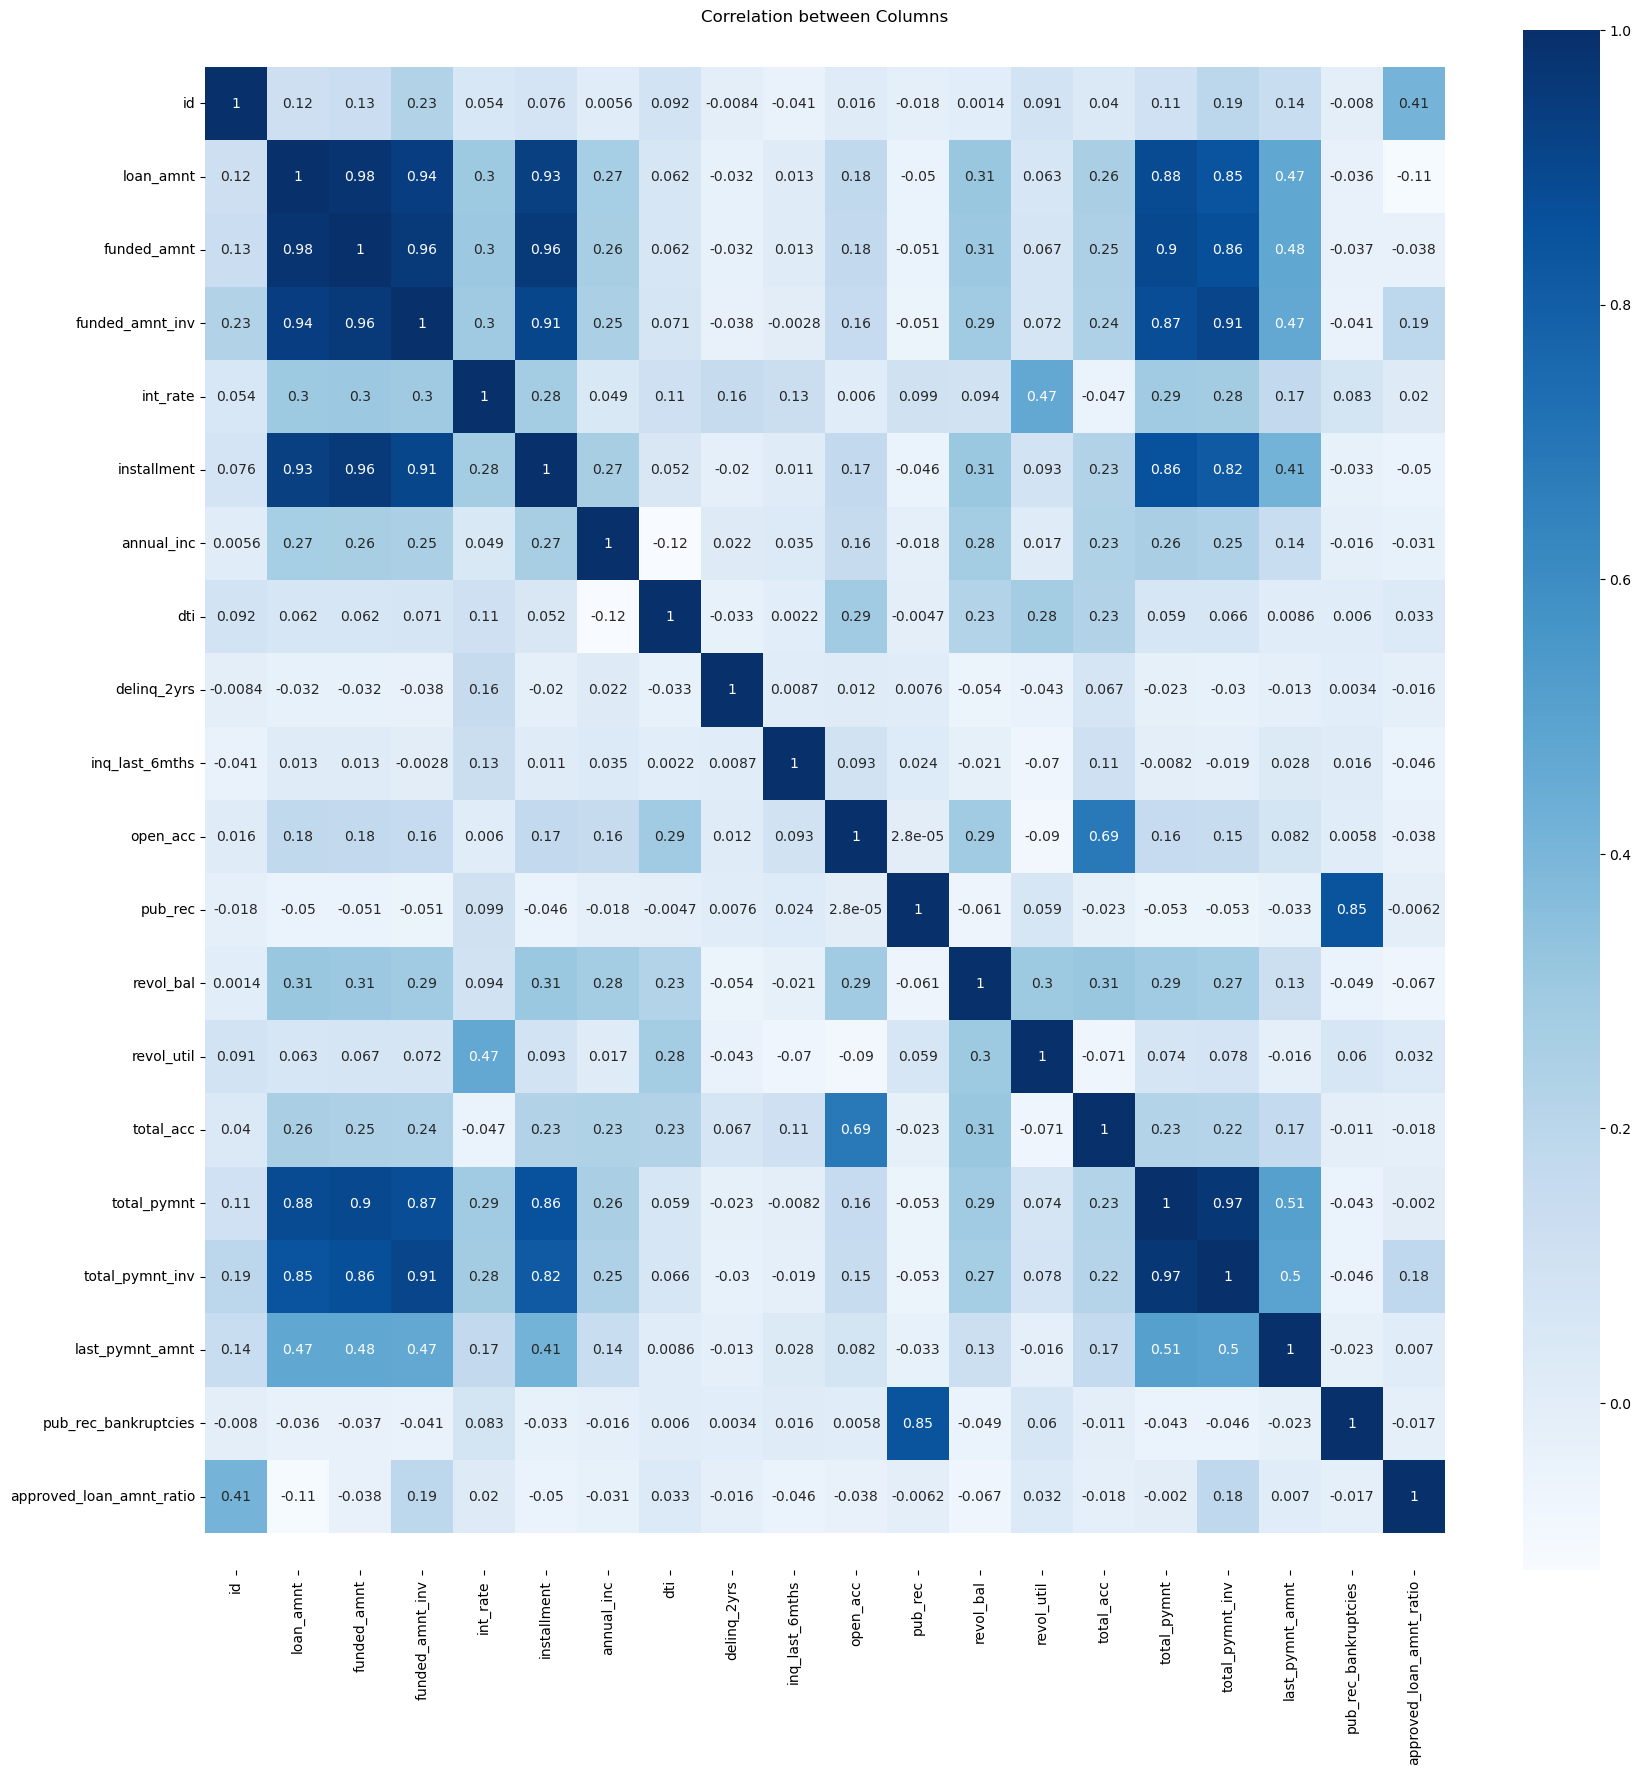

In [87]:
#Finding correlation matric
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

#### Observations:
##### The public derogatory records column is highly (+ve) correlated with public bankruptcies records.
##### Interest rates are high for people with high revol utilisation.